# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="D:/Project1/deep-reinforcement-learning/p3_collab-compet/Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


If an agent hits the ball over the net, it receives a reward of +0.1. If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01. Thus, the goal of each agent is to keep the ball in play.

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
#         print('rewards: ', rewards)
        dones = env_info.local_done                        # see if episode finished
#         print('dones: ',dones)
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
#         print(states[0])
#         print(states[1])
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

Solution Attempt with DDPG

Create Classes containing Neural Networks for Actor and Critic

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=256, fc2_units=128, fc3_units=64):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__() # Get init methods from nn.Module
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, fc3_units)
        self.fc4 = nn.Linear(fc3_units, action_size)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(*hidden_init(self.fc3))
        self.fc4.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return torch.tanh(self.fc4(x))


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, fcs1_units=256, fc2_units=128, fc3_units=64):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        self.fc2 = nn.Linear(fcs1_units+action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, fc3_units)
        self.fc4 = nn.Linear(fc3_units, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(*hidden_init(self.fc3))
        self.fc4.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        xs = F.relu(self.fcs1(state))
        x = torch.cat((xs, action), dim=1)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return self.fc4(x)

Create Agent Class for controlling weight updates for Actor and Critic Networks, for each Agent!

In [6]:
import random
import copy
from collections import namedtuple, deque
import torch.optim as optim

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4        # learning rate of the actor 
LR_CRITIC = 1e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, num_agents, state_size, action_size, random_seed):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
            num_agents (int): Number of Agents in Competitive/Cooperative play
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        self.num_agents = num_agents
        
        # Actor Network (w/ Target Network)
        # Sees only local observations
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        # Sees all observations (states and actions) from all agents in the environment
        self.critic_local = Critic(num_agents*state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(num_agents*state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        # Noise process
        self.noise = OUNoise(action_size, random_seed)

    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()
    
    def learn(self, experiences, local_observation, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences
        state, action, reward, next_state, done = local_observation
        
        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_state)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = reward + (gamma * Q_targets_next * (1 - done))
        # Compute critic loss
        Q_expected = self.critic_local(states, action)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()
        
        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(state)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)                        

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.4):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal DETERMINISTIC ACTION (= noise) to mean (mu)."""
        self.muAction = copy.copy(self.mu)

    def sample(self):
        """Update internal ACTION and return it as a noise sample."""
        x = self.muAction
        # "In DDPG, we inject Gaussian noise into the ACTIONS selected by the policy". - Grokking Deep RL book:
        dx = self.theta * (self.mu - x) + self.sigma * np.array([np.random.normal() for i in range(len(x))])
        self.state = x + dx
        return self.state

class MultiAgentReplayBuffer:
    """Fixed-size buffer to store experience tuples. Modified to pre-process experiences from multiple Agents"""

    def __init__(self, action_size, buffer_size, batch_size):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        # self.seed = random.seed(seed)
    
    def add(self, num_agents, states, actions, rewards, next_states, dones):
        """Add a new experience to memory."""
        
        j_state = np.array([])         # Joined Agents States (For Critic Input)
        j_action = np.array([])        # Joined Agents Actions (For Critic Input)
        j_next_state = np.array([])    # Joined Agents Next States (For Critic Input)
        for exp_in_agent in range(0, num_agents):
            j_state = np.concatenate([j_state, states[exp_in_agent]])
            j_action = np.concatenate([j_action, actions[exp_in_agent]])
            j_next_state = np.concatenate([j_next_state, next_states[exp_in_agent]])

        reward = rewards
        done = dones
        e = self.experience(j_state, j_action, rewards, j_next_state, dones)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [7]:
class MultiAgent():
    """Receives experiences from environment and sends experiences to apropriate Agents."""
    
    def __init__(self, num_agents, agent1, agent2, action_size):
        """Controls how separate Agents are updated
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
            num_agents (int): Number of Agents in Competitive/Cooperative play
        """

        self.agent1 = agent1 # Agent(num_agents, state_size, action_size, random_seed)
        self.agent2 = agent2 # Agent(num_agents, state_size, action_size, random_seed)
        self.num_agents = num_agents # Number of Agents
        # Replay memory
        self.memory = MultiAgentReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE)#, random_seed)
    
    def step(self, states, actions, rewards, next_states, dones):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        self.memory.add(self.num_agents, states, actions, rewards, next_states, dones)

        # Learn, if enough samples are available in memory
        if len(self.memory) > BATCH_SIZE:
            experiences = self.memory.sample()
            self.learn(experiences, GAMMA)

    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        """Sends appropriate experiences to each Agent.
        More specifically, local observations are sent to respective Agents, 
        so that their policies are Updated accordingly.
        
        Critic Networks for all Agents receive ALL state, actions and next states,
        so that the environment becomes Non-Stationary
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences # For all Agents (Critic Network)
        
        # Recover States, Actions, Rewards and next_states for each agent (Policy Network)
        st_agent1, st_agent2 = np.split(states.cpu(), self.num_agents, axis=1)
        ac_agent1, ac_agent2 = np.split(actions.cpu(), self.num_agents, axis=1)
        re_agent1, re_agent2 = np.split(rewards.cpu(), self.num_agents, axis=1)
        ns_agent1, ns_agent2 = np.split(next_states.cpu(), self.num_agents, axis=1)
        ds_agent1, ds_agent2 = np.split(dones.cpu(), self.num_agents, axis=1)
        
        dataTrainAgent1 = [st_agent1.cuda(), ac_agent1.cuda(), re_agent1.cuda(), ns_agent1.cuda(), ds_agent1.cuda()]
        dataTrainAgent2 = [st_agent2.cuda(), ac_agent2.cuda(), re_agent2.cuda(), ns_agent2.cuda(), ds_agent2.cuda()]
        
        self.agent1.learn(experiences, dataTrainAgent1, gamma)
        self.agent2.learn(experiences, dataTrainAgent2, gamma)     

Train Agent through DDPG method

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Episode 100	Average Score for last 100 Episodes: 0.01
Episode 200	Average Score for last 100 Episodes: 0.00
Episode 300	Average Score for last 100 Episodes: 0.00
Episode 400	Average Score for last 100 Episodes: 0.00
Episode 500	Average Score for last 100 Episodes: 0.01
Episode 600	Average Score for last 100 Episodes: 0.02
Episode 700	Average Score for last 100 Episodes: 0.01
Episode 800	Average Score for last 100 Episodes: 0.02
Episode 900	Average Score for last 100 Episodes: 0.03
Episode 1000	Average Score for last 100 Episodes: 0.02
Episode 1100	Average Score for last 100 Episodes: 0.02
Episode 1200	Average Score for last 100 Episodes: 0.03
Episode 1300	Average Score for last 100 Episodes: 0.05
Episode 1400	Average Score for last 100 Episodes: 0.06
Episode 1500	Average Score for last 100 Episodes: 0.05
Episode 1600	Average Score for last 100 Episodes: 0.08
Episode 1700	Average Score for last 100 Episodes: 0.06
Episode 1800	Average Score for last 100 Episodes: 0.07
Episode 1900	Averag

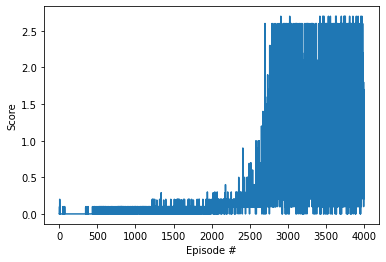

In [9]:
def ddpg(n_episodes=4000, print_every=100):
    agent1 = Agent(num_agents, state_size=24, action_size=2, random_seed=57)
    agent2 = Agent(num_agents, state_size=24, action_size=2, random_seed=57)
    multi_agent = MultiAgent(num_agents, agent1, agent2, action_size)
    scores_deque = deque(maxlen=print_every)
    scores = []
    scores_mean = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                 # get states (i,24) (for each agent i)
        score = np.zeros(num_agents)                          # initialize scores (for each agent i)
        multi_agent.agent1.reset()
        multi_agent.agent2.reset()
        while True:
            st_agent1, st_agent2 = np.split(states, num_agents)
            ac_agent1 = multi_agent.agent1.act(st_agent1)
            ac_agent2 = multi_agent.agent2.act(st_agent2)
            actions = np.stack((ac_agent1[0], ac_agent2[0]))
            
            env_step = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_step.vector_observations         # get next states (for each agent)
            rewards = env_step.rewards                         # get reward (for each agent)
            dones = env_step.local_done                        # see if episode finished
            multi_agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += rewards
            if np.any(dones):                                  # exit loop if episode finished
                break
#         if i_episode % 100 == 0:
#             print('Score (max over agents) from episode {}: {}'.format(i_episode, np.max(score)))
        scores_deque.append(np.max(score))                   # Max Score between 2 Agents
        scores.append(np.max(score))                         # Max Score between 2 Agents
#         print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        if i_episode % print_every == 0:
            # Mean score for last 100 Episodes:
            print('\rEpisode {}\tAverage Score for last 100 Episodes: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            scores_mean.append(np.mean(scores_deque))
            torch.save(multi_agent.agent1.actor_local.state_dict(), 'agent1_checkpoint_actor.pth')
            torch.save(multi_agent.agent1.critic_local.state_dict(), 'agent1_checkpoint_critic.pth')
            torch.save(multi_agent.agent2.actor_local.state_dict(), 'agent2_checkpoint_actor.pth')
            torch.save(multi_agent.agent2.critic_local.state_dict(), 'agent2_checkpoint_critic.pth')
            
    return scores, scores_mean

scores, scores_mean = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [17]:
scores_mean_x_axis = np.linspace(0, 4000, len(scores_mean))

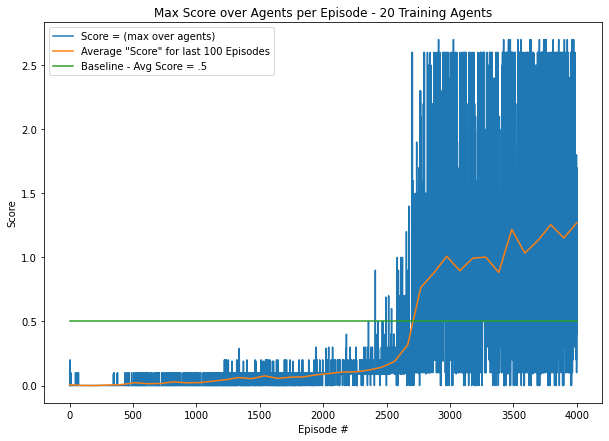

In [18]:
# plot the scores
baselineEP = [0, 4000]
baselineREF = [.5, .5]
fig = plt.figure(figsize = [10,7])
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label = 'Score = (max over agents)')
plt.plot(scores_mean_x_axis, scores_mean, label = 'Average "Score" for last 100 Episodes')
plt.plot(baselineEP, baselineREF,label = 'Baseline - Avg Score = .5')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Max Score over Agents per Episode - 20 Training Agents')
plt.legend()
plt.show()

fig.savefig('TrainedResults.jpg')

In [ ]:
env.close()

In [ ]:
agent_test_1 = Agent(num_agents, state_size=24, action_size=2, random_seed=57)
agent_test_2 = Agent(num_agents, state_size=24, action_size=2, random_seed=57)

agent_test_1.actor_local.load_state_dict(torch.load('agent1_checkpoint_actor.pth', map_location='cpu')) # Load Actor weights theta
agent_test_1.critic_local.load_state_dict(torch.load('agent1_checkpoint_critic.pth', map_location='cpu')) # Load Critic weights phi
agent_test_2.actor_local.load_state_dict(torch.load('agent2_checkpoint_actor.pth', map_location='cpu')) # Load Actor weights theta
agent_test_2.critic_local.load_state_dict(torch.load('agent2_checkpoint_critic.pth', map_location='cpu')) # Load Critic weights phi

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    st_agent1, st_agent2 = np.split(states, num_agents)
    ac_agent1 = agent_test_1.act(st_agent1)
    ac_agent2 = agent_test_2.act(st_agent2)
    actions = np.stack((ac_agent1[0], ac_agent2[0]))
    
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
        
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))